In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.options.display.max_columns = None

In [4]:
data_uais = pd.read_csv("data/MoviesUAIS.csv")

In [5]:
data_kinopoisk = pd.read_csv("data/MoviesKinopoisk.csv")

In [6]:
data_google = pd.read_csv("data/google_serach_weeks.csv")

In [37]:
data_google.columns = ["title_uais"] + list(data_google.columns[1:])

In [40]:
data_google[data_google.columns[1:]] = data_google[data_google.columns[1:]].fillna(
    data_google[data_google.columns[1:]].mean()
)

In [9]:
data = data_kinopoisk.set_index(data_kinopoisk.columns[0])\
    .join(data_uais.set_index(data_uais.columns[0]))

In [10]:
data = data\
    .replace('None', np.nan)\
    .replace('None :', np.nan)\
    .replace('{}', np.nan)\
    .replace('()', np.nan)

In [11]:
data = data[~data.index.duplicated()]

In [12]:
data = data.reset_index().rename({"index": "title_uais"}, axis=1)

In [13]:
data.shape

(774, 45)

In [14]:
import datetime
import locale

In [15]:
locale.setlocale(locale.LC_TIME, "ru_RU")

'ru_RU'

In [16]:
data.head()

,title_uais,id,title,title_en,plot,year,countries,tagline,actors,directors,screenwriters,producers,operators,composers,art_direction_by,editing_by,genres,cast,budget,marketing,profit_usa,profit_russia,profit_world,audience,rating,votes,imdb_rating,imdb_votes,runtime,release,posters,trailers,youtube_ids,series,series_years,release_russia,release_world,viewers,budget.1,age_restr,release_date_uais,magic_number,profit_uais,type_uais,age_restriction
0,1+1: Голливудская история,596484,1+1: Голливудская история,The Upside,"Пентхаус в Нью Йорке, целый гараж коллекционны...",2018,США,«Одинокий миллиардер в поисках острых ощущений»,"Брайан Крэнстон, Кевин Харт, Николь Кидман, Эй...",Нил Бёргер,"Джон Хартмир, Эрик Толедано, Оливье Накаш","Тодд Блэк, Дэвид Дж. Блумфилд, Джейсон Блюменталь",Стюарт Драйбёрг,Роб Симонсен,"Марк Фридберг, Том Фролинг, Ким Дженнингс",Наоми Джерати,"драма, комедия",NaN,37500000,NaN,108252517,329437,125852517,NaN,6.014,8371,NaN,NaN,126,NaN,NaN,NaN,NaN,FALSE,NaN,8 сентября 2017,10 января 2019,NaN,$37 500 000,NaN,NaN,NaN,NaN,NaN,NaN
1,100 вещей и ничего лишнего,1121377,100 вещей и ничего лишнего,100 Dinge,"Лучшие друзья Пауль и Тони, находясь буквально...",2018,Германия,NaN,"Флориан Давид Фиц, Маттиас Швайгхёфер, Мириам ...",Флориан Давид Фиц,Флориан Давид Фиц,"Дан Мааг, Дэниэль Зоннабенд, Антье Банкманн",Бернхард Яспер,"Джозеф Бах, Арни Шуманн","Кристиан Эйзель, Метин Мисдик, Александра Пиль...","Денис Бахтер, Ана де Миер и Ортуньо",комедия,NaN,NaN,NaN,NaN,254129,14093397,NaN,6.856,13077,6.5,2709,111,NaN,NaN,NaN,NaN,FALSE,NaN,6 декабря 2018,28 марта 2019,NaN,$14 093 397,NaN,NaN,NaN,NaN,NaN,NaN
2,2001 год: Космическая одиссея,380,2001 год: Космическая одиссея,2001: A Space Odyssey,Экипаж космического корабля «Дискавери» — капи...,1968,"Великобритания, США",«the time is now. 2001 re-release»,"Кир Дуллеа, Гэри Локвуд, Уильям Сильвестр, Дэн...",Стэнли Кубрик,"Артур Ч. Кларк, Стэнли Кубрик","Стэнли Кубрик, Виктор Линдон",Джеффри Ансуорт,NaN,"Эрнест Арчер, Гарри Ланж, Энтони Мастерс",Рэй Лавджой,"фантастика, приключения",NaN,12000000,NaN,56715371,152691,57287357,NaN,7.963,70758,8.3,570523,149,NaN,NaN,NaN,NaN,FALSE,NaN,2 апреля 1968,30 августа 2018,"43.4 млн, 3.26 млн, 2.91 млн, ...",$56 715 371,NaN,NaN,NaN,NaN,NaN,NaN
3,21 мост,1174226,21 мост,21 Bridges,Потомственный полицейский Андре Дэвис с самыми...,2019,США,«От него не уйти»,"Чедвик Боузман, Сиенна Миллер, Тейлор Китч, Дж...",Брайан Кирк,"Адам Мервис, Мэттью Майкл Карнахан","Чедвик Боузман, Логан Коулз, Гиги Притцкер",Пол Кэмерон,"Alex Belcher, Генри Джекман","Грег Берри, Маттео Де Космо, Дэвид С. Робинсон",Тим Мёрелл,"боевик, криминал, триллер",NaN,NaN,NaN,28539757,373844,49939757,NaN,6.569,10244,NaN,NaN,99,NaN,NaN,NaN,NaN,FALSE,NaN,25 сентября 2019,5 декабря 2019,85 тыс.,$28 539 757,NaN,NaN,NaN,NaN,NaN,NaN
4,22 мили,921938,22 мили,Mile 22,Призраки — элитный отряд сверхсекретной развед...,2018,"Китай, США, Колумбия",«Призраки не играют по правилам»,"Марк Уолберг, Лорен Кохэн, Ико Уайс, Джон Малк...",Питер Берг,"Лиа Карпентер, Грэм Роланд","Питер Берг, Стивен Левинсон, Марк Уолберг",Жак Жуффре,Джефф Руссо,"Эндрю Мензес, Алан Хук, Алекс МакКэрролл","Мелисса Лосон, Колби Паркер мл.","боевик, триллер",NaN,50000000,NaN,36108758,571315,66308758,NaN,5.858,13420,NaN,NaN,94,NaN,NaN,NaN,NaN,FALSE,NaN,16 августа 2018,23 августа 2018,NaN,$50 000 000,NaN,NaN,121017318.0,37448540.97,художественный,«18+» запрещено для детей


In [17]:
categorical_features =  ["actors", "directors", "screenwriters", "producers", "operators", "composers", 
                         "art_direction_by", "editing_by", "genres", "type_uais", "age_restriction", "countries"]
numerical_faetures = ["budget.1", "runtime"]
id_feautuers = ["id"]
time_features = ["release_russia", "release_world"]
text_features = ["plot", "title_uias", "tagline"]
targets = ["revenenue", "profit_russia", "profit_world", "viewers", "votes", "rating"]

trash_features = ["cast", "budget", "marketing", "audience", "imdb_rating", "imdb_votes", "release", 
                  "trailers", "posters", "youtube_ids", "series", "youtube_ids", "series_years", "age_restr", "magic_number"]



In [18]:
data = data.drop(trash_features, axis=1)

In [19]:
numeric_data = data[numerical_faetures]
categorical_data = data[categorical_features]
time_data = data["release_world"]

In [20]:
numeric_data

,budget.1,runtime
0,$37 500 000,126
1,$14 093 397,111
2,$56 715 371,149
3,$28 539 757,99
4,$50 000 000,94
...,...,...
769,$28 714 231,95
770,NaN,100
771,$15 100 000,106
772,$1 700 000,102


In [21]:
categorical_data

,actors,directors,screenwriters,producers,operators,composers,art_direction_by,editing_by,genres,type_uais,age_restriction,countries
0,"Брайан Крэнстон, Кевин Харт, Николь Кидман, Эй...",Нил Бёргер,"Джон Хартмир, Эрик Толедано, Оливье Накаш","Тодд Блэк, Дэвид Дж. Блумфилд, Джейсон Блюменталь",Стюарт Драйбёрг,Роб Симонсен,"Марк Фридберг, Том Фролинг, Ким Дженнингс",Наоми Джерати,"драма, комедия",NaN,NaN,США
1,"Флориан Давид Фиц, Маттиас Швайгхёфер, Мириам ...",Флориан Давид Фиц,Флориан Давид Фиц,"Дан Мааг, Дэниэль Зоннабенд, Антье Банкманн",Бернхард Яспер,"Джозеф Бах, Арни Шуманн","Кристиан Эйзель, Метин Мисдик, Александра Пиль...","Денис Бахтер, Ана де Миер и Ортуньо",комедия,NaN,NaN,Германия
2,"Кир Дуллеа, Гэри Локвуд, Уильям Сильвестр, Дэн...",Стэнли Кубрик,"Артур Ч. Кларк, Стэнли Кубрик","Стэнли Кубрик, Виктор Линдон",Джеффри Ансуорт,NaN,"Эрнест Арчер, Гарри Ланж, Энтони Мастерс",Рэй Лавджой,"фантастика, приключения",NaN,NaN,"Великобритания, США"
3,"Чедвик Боузман, Сиенна Миллер, Тейлор Китч, Дж...",Брайан Кирк,"Адам Мервис, Мэттью Майкл Карнахан","Чедвик Боузман, Логан Коулз, Гиги Притцкер",Пол Кэмерон,"Alex Belcher, Генри Джекман","Грег Берри, Маттео Де Космо, Дэвид С. Робинсон",Тим Мёрелл,"боевик, криминал, триллер",NaN,NaN,США
4,"Марк Уолберг, Лорен Кохэн, Ико Уайс, Джон Малк...",Питер Берг,"Лиа Карпентер, Грэм Роланд","Питер Берг, Стивен Левинсон, Марк Уолберг",Жак Жуффре,Джефф Руссо,"Эндрю Мензес, Алан Хук, Алекс МакКэрролл","Мелисса Лосон, Колби Паркер мл.","боевик, триллер",художественный,«18+» запрещено для детей,"Китай, США, Колумбия"
...,...,...,...,...,...,...,...,...,...,...,...,...
769,"Самара Уивинг, Адам Броди, Марк ОБрайэн, Генри...","Мэттью Беттинелли, Тайлер Джиллетт","Гай Бусик, Райан Мерфи","Брэдли Дж. Фишер, Уильям Шерак, Джеймс Вандербилт",Бретт Юткевич,Брайан Тайлер,"Эндрю М. Стерн, Эйвери Плюз, Майк Леандро",Терел Гибсон,"триллер, комедия, ужасы",NaN,NaN,"США, Канада"
770,"Филипп Рейнхардт, Анна Чурина, Кристина Бабушк...",Руслан Паушу,"Руслан Паушу, Алексей А. Петрухин","Алексей А. Петрухин, Вячеслав Чернявский",Илья Бойко,NaN,Анна Чернова,NaN,"комедия, драма",NaN,NaN,Россия
771,"Мэдисон Вульф, Зои Салдана, Имоджен Путс, Сидн...",Андерс Вальтер Хансен,"Джо Келли, Х. М. Кэн Ниимура","Джо Келли, Анна Барнатан, Майкл Барнатан",Расмус Дж. Хейз,Лорен Перез,"Сьюзи Каллен, Жиль Балабо, Тамара Конбой",Ларс Уиссинг,"фэнтези, триллер, драма",художественный,«12+» для детей старше 12 лет,"Бельгия, Великобритания, США, Китай"
772,"Александра Бортич, Ирина Горбачева, Сергей Шну...",Алексей Нужный,"Николай Куликов, Алексей Нужный, Константин Майер","Сергей Корнихин, Николай Куликов, Алексей Нужный",Кирилл Клепалов,"Дмитрий Ланской, Дмитрий Емельянов",Маргарита Аблаева,Авет Оганесян,комедия,художественный,«16+» для детей старше 16 лет,Россия


# Preprocessing

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer

## Categorical features

In [23]:
from googletrans import Translator
translator = Translator()

trash = set({'1150000', 'Симон Гстоттмайр'})

def extract_genres(data):
    binarizer = MultiLabelBinarizer()
    res = binarizer.fit_transform(list(map(
        lambda r: set(map(str.strip, r.split(","))) - trash if not pd.isnull(r) else [],
        data.genres
    )))
    names = list(map(lambda x: "genre_" + translator.translate(x, src="ru", dest="en").text.lower(), binarizer.classes_))
    return pd.DataFrame(res, columns=names)


def extract_country(data):
    binarizer = MultiLabelBinarizer()
    res = binarizer.fit_transform(list(map(
        lambda r: set(map(str.strip, r.split(","))) - trash if not pd.isnull(r) else [],
        data.genres
    )))
    names = list(map(lambda x: "country_" + translator.translate(x, src="ru", dest="en").text.lower(), binarizer.classes_))
    return pd.DataFrame(res, columns=names)

def extract_type(data):
    lb = LabelBinarizer()
    res = lb.fit_transform(list(map(lambda x: x if not pd.isnull(x) else "None", data.type_uais)))
    names = list(map(lambda x: "type_" + translator.translate(x, src="ru", dest="en").text.lower(), lb.classes_))
    return pd.DataFrame(res, columns=names).drop("type_none", axis=1)

def extract_age(data):
    lb = LabelBinarizer()
    res = list(map(
        lambda x: "6" if x == "66" else x,
        map(
            lambda x: "".join(filter(str.isdigit, x))[:2] if not pd.isnull(x) else "none", 
            data.age_restriction
        )
    ))
    res = lb.fit_transform(res)
    names = list(map(lambda x: "age_" + x, lb.classes_))
    res = pd.DataFrame(res, columns=names)
    res.age_0 += res.age_
    return res.drop(["age_none", "age_"], axis=1)

## Numerical features

In [24]:
from price_parser import Price
from currency_converter import CurrencyConverter
c = CurrencyConverter()

currecies = {
    '$':    'USD',
    'CAD':  'CAD',
    'CNY':  'CNY',
    '£':    'GBP',
    '¥':    'JPY',
    'р':    'RUB',
    'руб.':  'RUB',
    '€':    'EUR',
}

def parse_budget(s):
    if pd.isnull(s):
        return np.nan
    
    p = Price.fromstring(s)
    if p.currency == 'USD':
        return np.rount(p.amount)
    if p.currency is not None and p.amount is not None:
        p.currency = currecies[p.currency]
        return np.round(c.convert(p.amount, p.currency, "USD"))
    else: 
        return np.nan

def transform_numeric_features(data, fillna=False):
    data["budget"] = list(map(lambda b: parse_budget(b), data["budget.1"]))
    data["runtime"] = list(map(lambda x: int(x) if (not pd.isnull(x) and not len(list(filter(str.isdigit, str(x)))) == 0) else np.nan, data.runtime))
    data = data.drop("budget.1", axis=1)
    if fillna:
        data["budget"] = data["budget"].fillna(data["budget"].mean())
        data["runtime"] = data["runtime"].fillna(data["runtime"].mean())
        
    return data
    
    


In [25]:
def parse_time_data(data):
    return pd.DataFrame({
        "release": list(
            map(
                lambda x: datetime.datetime.strptime(x, "%d %B %Y").timestamp() if not pd.isnull(x) else np.nan,
                data
            )
        )
    })

In [26]:
def extract_numerical_data_from_categorical(data):
    result_dict = dict()
    for feature in ["actors", "directors", "screenwriters", "producers", "operators", 
                    "composers", "art_direction_by", "editing_by"]:
        result_dict["num_" + feature] = list(map(lambda x: len(x.split(",")) if not pd.isnull(x) else 0, data[feature]))
    
    return pd.DataFrame(result_dict)

In [27]:
X = pd.concat([
    transform_numeric_features(numeric_data, fillna=True),
    extract_numerical_data_from_categorical(categorical_data),
    extract_genres(categorical_data),
    extract_country(categorical_data),
    extract_type(categorical_data),
    extract_age(categorical_data)
], axis=1)

/Users/nikitakrutoy/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nikitakrutoy/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Cleaning

In [28]:
mask = ~np.logical_or(
    X.isnull().any(axis=1).values,
    data["profit_russia"].isnull().values,
)

In [29]:
X = X[mask]

In [30]:
y = np.array(list(map(float, data["profit_russia"][mask].values)))

In [31]:
X = X[y > 100]
y = y[y > 100]

In [32]:
X_ = X.copy()

In [33]:
X_["title_uais"] = data["title_uais"]

In [30]:
X_.to_csv("data/MoviesKinopoiskPreprocessed.csv", index=False)

# Trends

In [42]:
X_w_trends = pd.merge(X_, data_google, on="title_uais")

In [144]:
X_w_trends.to_csv("data/MoviesKinopoiskPreprocessedWithTrends.csv", index=False)

# Modeling

In [123]:
from sklearn.preprocessing import FunctionTransformer

In [135]:
from lightgbm.sklearn import LGBMRegressor, LGBMClassifier

In [45]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate

In [129]:
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, precision_score

In [48]:
pd.isnull(y).any()

False

In [49]:
np.random.seed(seed=42)

In [58]:
from tqdm.auto import tqdm

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
def compare_features(X_1, X_2, y, label1="X_1", label2="X_2"):
    scores = np.array([
        cross_val_score(
            LGBMRegressor(), 
            X_1, y, 
            cv=KFold(n_splits=5, shuffle=True), 
            scoring=make_scorer(r2_score)
        ).mean()
        for _ in tqdm(range(100))
    ])
    plt.hist(scores, label=label1, alpha=0.5)
    plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1, label=f"Mean {label1}")
    plt.ylabel("R2 score")
    print(scores.mean())

    scores = np.array([
        cross_val_score(
            LGBMRegressor(), 
            X_2, y, 
            cv=KFold(n_splits=5, shuffle=True), 
            scoring=make_scorer(r2_score)
        ).mean()
        for _ in tqdm(range(100))
    ])
    plt.hist(scores, label=label2, alpha=0.5)
    plt.axvline(scores.mean(), color='k', linewidth=1, label=f"Mean {label2}")
    plt.legend()
    print(scores.mean())

## Trends

0.3092821885719858


0.3234925759031716


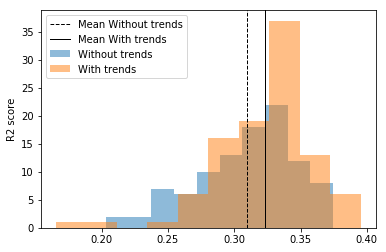

In [97]:
compare_features(X, X_w_trends.drop("title_uais", axis=1), y=y, label1="Without trends", label2="With trends")

0.4340857190528336


0.5016380646079316


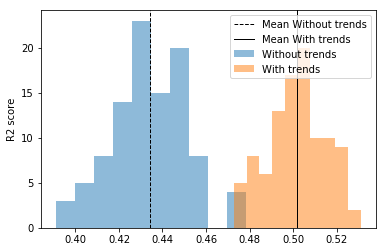

In [101]:
compare_features(X, X_w_trends.drop("title_uais", axis=1), y=np.log(y), label1="Without trends", label2="With trends")

## Scaling and Poly featrures

In [90]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
ss = StandardScaler()
compare_features(
    X_w_trends.drop("title_uais", axis=1), 
    ss.fit_transform(X_w_trends.drop("title_uais", axis=1)),
    y=np.log(y), 
    label1="Without trends", label2="With trends"
)

In [102]:
pf = PolynomialFeatures()

In [105]:
pf_features = ["budget"] + \
    list(filter(lambda x: "pr_week" in x, X_w_trends.columns)) + \
    list(filter(lambda x: "num" in x, X_w_trends.columns))

In [114]:
X_poly = np.hstack([
    X_w_trends.drop(pf_features + ["title_uais"], axis=1).values,
    pf.fit_transform(X_w_trends[pf_features])[:, 1:]
])

0.5048133524114464


0.5162469448710238


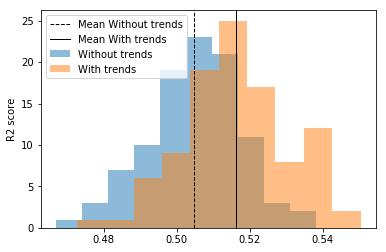

In [117]:
compare_features(
    X_w_trends.drop("title_uais", axis=1), 
    X_poly,
    y=np.log(y), 
    label1="Without trends", label2="With trends"
)

## Classification

In [142]:
for i, j in zip(start, end):
    print(f"{int(i):,} - {int(j):,}")

19,401 - 65,312
65,643 - 105,367
107,272 - 203,928
204,356 - 378,593
381,037 - 842,842
843,304 - 1,940,697
1,964,670 - 6,613,491
6,740,201 - 53,876,764


In [127]:
def make_classes(x, n=8):
    start, end = np.vectorize(lambda x: (x[0], x[-1]))(
        np.array_split(np.sort(y), n)
    )
    
    def _make_class(x):
        for cls, (i, j) in enumerate(zip(start, end)):
            if i <= x <= j:
                return cls
        return -1 
    return np.array(list(map(_make_class, x)))

### Macro

In [137]:
scores = np.array([
    cross_val_score(
        LGBMClassifier(), 
        X_w_trends.drop("title_uais", axis=1),  make_classes(y), 
        cv=KFold(n_splits=5, shuffle=True), 
        scoring=make_scorer(precision_score, average="macro")
    ).mean()
    for _ in tqdm(range(10))
])

NameError: name 'label1' is not defined

0.3314404720593491


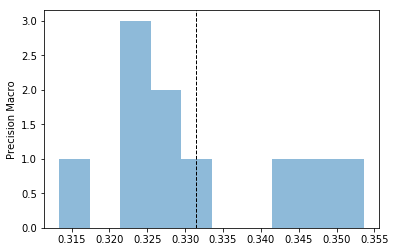

In [138]:
plt.hist(scores, alpha=0.5)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel("Precision Macro")
print(scores.mean())

### Micro

In [139]:
scores = np.array([
    cross_val_score(
        LGBMClassifier(), 
        X_w_trends.drop("title_uais", axis=1),  make_classes(y), 
        cv=KFold(n_splits=5, shuffle=True), 
        scoring=make_scorer(precision_score, average="micro")
    ).mean()
    for _ in tqdm(range(10))
])

0.32650668036998975


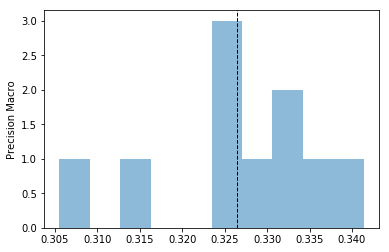

In [140]:
plt.hist(scores, alpha=0.5)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel("Precision Micro")
print(scores.mean())

### R2

0.21287173039087307


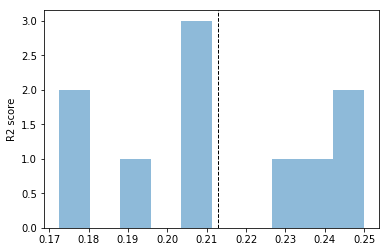

In [141]:
scores = np.array([
    cross_val_score(
        LGBMClassifier(), 
        X_w_trends.drop("title_uais", axis=1),  make_classes(y), 
        cv=KFold(n_splits=5, shuffle=True), 
        scoring=make_scorer(r2_score)
    ).mean()
    for _ in tqdm(range(10))
])
plt.hist(scores, alpha=0.5)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel("R2 score")
print(scores.mean())

In [51]:
results = cross_validate(    
    LGBMRegressor(), 
    X, y, 
    cv=KFold(n_splits=5, shuffle=True), 
    scoring=make_scorer(r2_score),
    return_estimator=True
)

In [52]:
np.mean(results["test_score"])

0.3041116301234892

In [53]:
best_model = results["estimator"][np.argmax(results["test_score"])]

In [54]:
y_pred = best_model.predict(X)

In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [57]:
x = np.random.choice(np.arange(len(y)), size=100, replace=False)

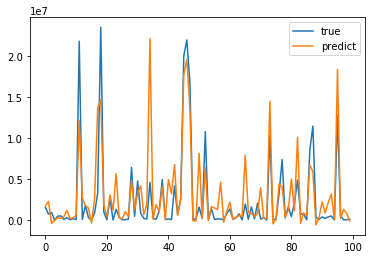

In [58]:
plt.plot(y[x], label="true"),
plt.plot(y_pred[x], label="predict", alpha=1)
plt.legend()
plt.savefig("pics/plot.png")
plt.show()

In [59]:
import scipy

In [60]:
scipy.spatial.distance.cosine(y, y_pred)

0.14596643753276928

In [63]:
scores = cross_val_score(
    LGBMRegressor(), 
    X, np.log(y), 
    cv=KFold(n_splits=5, shuffle=True), 
    scoring=make_scorer(r2_score)
)
scores

array([0.39820468, 0.50533416, 0.35680614, 0.42114436, 0.38293625])

In [64]:
np.clip(scores, 0, 1).mean()

0.4128851198526807